# CS166 Session 7.2 PCW 

## Markov Chain Monte Carlo Simulations 

In [1]:
import random as rand 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as sts 

In [106]:
# Target distribution 

def f(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z
    
    elif abs(x) > 1:
        return ((3 - abs(x)) / 2 - (3/7) * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)) / Z
    
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z
    
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    
    else:
        return 2.25 / Z
    
# Proposal Distribution 
def g(y):
    
    return sts.norm.rvs(loc = y, scale = 2)


In [107]:
def MCMC_sim(n):
    
    x = rand.random()
    step = 0 
    samples = []    
    
    for i in range(n):
        target_density = f(x)
        proposed_state = g(x)
        proposed_density = f(proposed_state)
        
        if step%100 == 0:
            samples.append(x)
            
        if target_density == 0: 
            x = proposed_state 
            
        else:
            if rand.random() <= min(1, proposed_density/target_density):
                x = proposed_state

            else: 
                x = x  
            
        step += 1
        

        
            
    return samples 

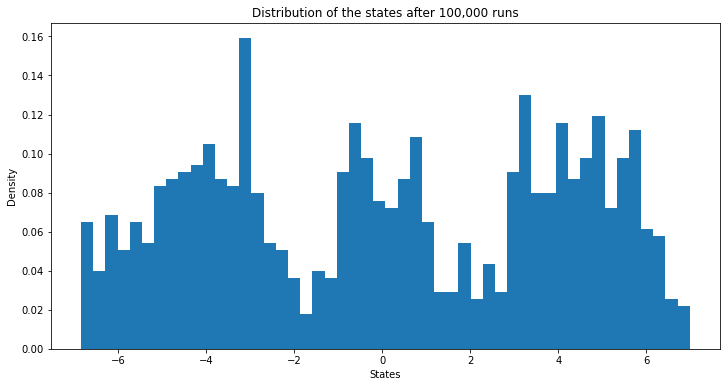

Total number of steps: 1000


In [108]:
plt.figure(figsize = (12,6))

sims = MCMC_sim(100000)

plt.hist(sims, density = True, bins = 50)
plt.title("Distribution of the states after 100,000 runs")
plt.xlabel("States")
plt.ylabel("Density")
plt.show()

print("Total number of steps:", len(sims))